In [209]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [210]:
df = pd.read_csv("C:/Users/Amy Le - PC/Documents/WA_Fn-UseC_-Telco-Customer-Churn.csv", low_memory = False)
df = df.replace(" ", np.NaN)
###The telecom dataset is collected from IBM Watson Analytics 
###"https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/"


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [212]:
print(df.shape)
df.head()
### The dataset has 21 attributes and 7043 instances(customers)
### Churn (yes, no) is the target feature

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Preprocessing


In [213]:
df.isnull().sum()
### Checking missing values-> there are 11 missing values in “TotalCharges” column.

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [214]:
df.dropna(inplace=True) #remove all rows with missing values

In [215]:
### I assume that "No internet service" value is the same as "No" value for the following attributes: MultipleLines; 
#OnlineSecurity; OnlineBackup; DeviceProtection; TechSupport; StreamingTV; StreamingMovies
### "No phone service" value is the same as "No" value for "MultipleLine" attribute

df.replace("No internet service", "No", inplace = True)
df.replace("No phone service", "No", inplace = True)

### Change the value for 'SeniorCitizen' attribute
replacements = {
  1: 'Yes',
  0: 'No'
}
df['SeniorCitizen'].replace(replacements, inplace=True)

#Remove 'Customer_ID' column
df = df.drop(['customerID'], axis =1)

# Convert'TotalCharges' to numeric type
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric) 




                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000


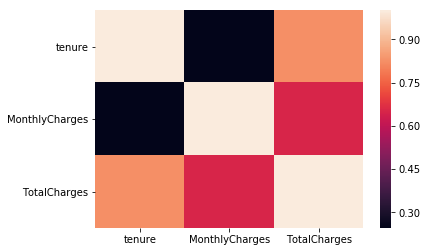

In [216]:
#Correlation Between continuous attributes
correlations = df.corr(method='pearson')
print(correlations)
sns.heatmap(correlations)
### As we can see, 'TotalCharges' are correlated with both 'tenure' and 'MonthlyCharges', so I remove this attribute 
#from the model.


In [217]:
df.drop(['TotalCharges'], axis =1, inplace = True)

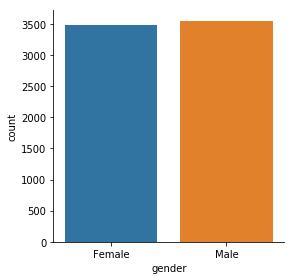

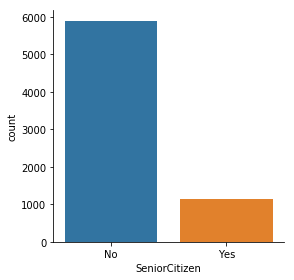

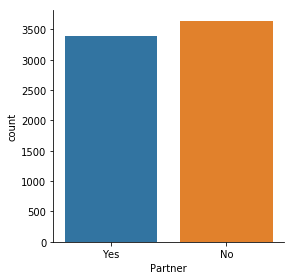

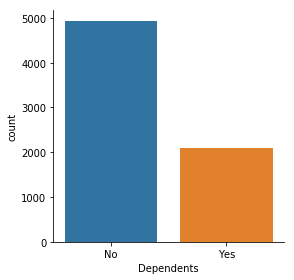

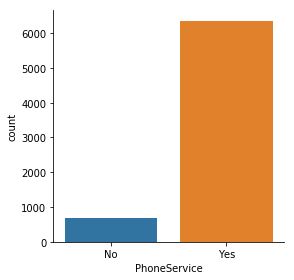

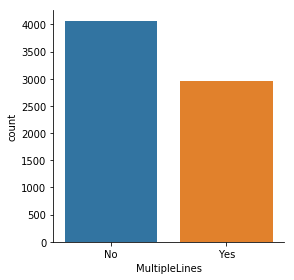

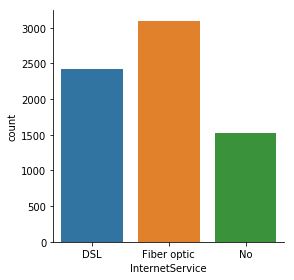

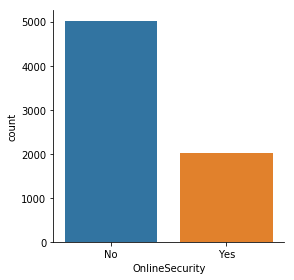

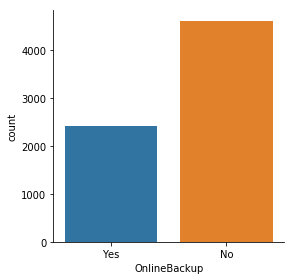

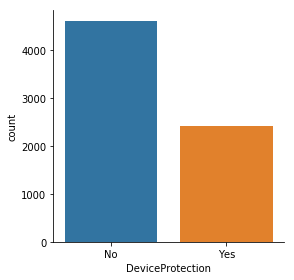

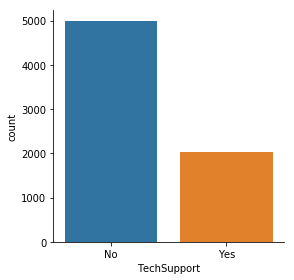

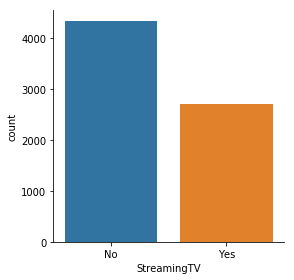

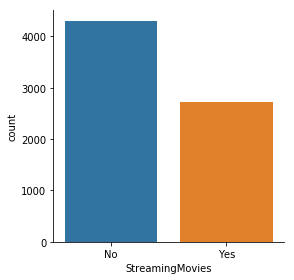

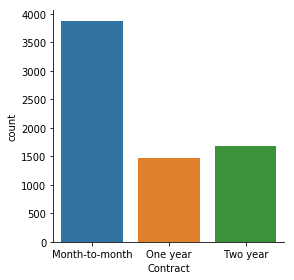

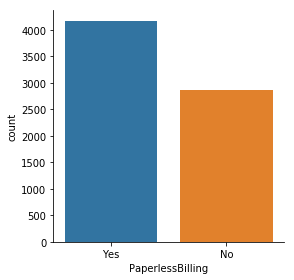

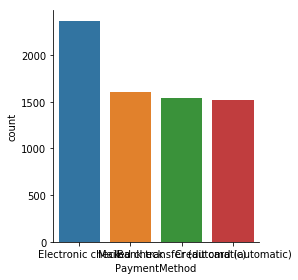

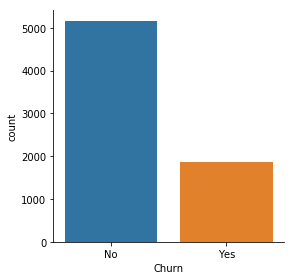

In [218]:
### Bar plots of categorical value
cat_col = df.select_dtypes(exclude=[np.number]).columns.tolist()
for feature in cat_col:
   sns.factorplot(feature,data=df,kind='count')


In [219]:
### The categorical variables seem to have broad distribution, so I keep them for analysis

In [220]:
###Label encoding
#Creating a list of categorical features

for i in df.columns:
    if i in cat_col:
        df[i] = df[i].astype('category').cat.codes
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [221]:
#Class distribution
class_counts = df.groupby('Churn').size()
print(class_counts)

#Outcome of this dataset is a majority of 'Churn ==0 (no)' class. Therefore, F1 score is more useful than accuracy score 
#as a metric for model evaluation. 

Churn
0    5163
1    1869
dtype: int64


In [222]:
Y = df.iloc[:,-1]

In [223]:
X = df.drop(['Churn'], axis =1)

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics


X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, Y, X.index, test_size=0.3, random_state=0)

###Make sure the frequency of churn is approximately the same for training data as well as for test data

print('% Churn: ', Y[Y== 1].shape[0] / Y.shape[0] * 100)
print('Train - size:', y_train.shape[0], ', %Churn:', y_train[y_train == 1].shape[0] / y_train.shape[0] * 100)
print('Test - size:', y_test.shape[0], ', %Churn: ', y_test[y_test == 1].shape[0] / y_test.shape[0] * 100)

% Churn:  26.578498293515356
Train - size: 4922 , %Churn: 26.696464851686308
Test - size: 2110 , %Churn:  26.303317535545023


In [225]:
# Suport Vector Machine classifier
model1 = LinearSVC()
# Train the supervised model on the training set using .fit(X_train, y_train)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test) #predicted class
print(metrics.classification_report(y_test, y_pred1))


             precision    recall  f1-score   support

          0       0.74      1.00      0.85      1555
          1       0.00      0.00      0.00       555

avg / total       0.54      0.74      0.63      2110



C:\Users\Amy Le - PC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [226]:
#Random Forest classifier

model2 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
# Train the supervised model on the training set using .fit(X_train, y_train)
model2 = model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(metrics.classification_report(y_test, y_pred2))



             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1555
          1       0.62      0.47      0.53       555

avg / total       0.77      0.78      0.77      2110



In [227]:
# Extract the feature importances using .feature_importances_ 
importances = model2.feature_importances_
print(X_train.columns)
print(importances)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges'],
      dtype='object')
[ 0.03253865  0.02570898  0.0266515   0.02276158  0.23677029  0.0084782
  0.02488759  0.043508    0.02611637  0.0242598   0.02307955  0.02620017
  0.02093643  0.02154816  0.0993823   0.03261973  0.06264369  0.24190901]


Feature ranking:
1. feature 17 (0.241909)
2. feature 4 (0.236770)
3. feature 14 (0.099382)
4. feature 16 (0.062644)
5. feature 7 (0.043508)
6. feature 15 (0.032620)
7. feature 0 (0.032539)
8. feature 2 (0.026651)
9. feature 11 (0.026200)
10. feature 8 (0.026116)
11. feature 1 (0.025709)
12. feature 6 (0.024888)
13. feature 9 (0.024260)
14. feature 10 (0.023080)
15. feature 3 (0.022762)
16. feature 13 (0.021548)
17. feature 12 (0.020936)
18. feature 5 (0.008478)


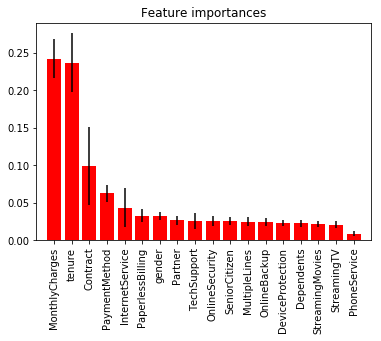

In [228]:
# Print the feature ranking
std = np.std([tree.feature_importances_ for tree in model2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()



From the graph, we learn that the 'MonthlyCharges', 'tenure','Contract', and 'Payment Method'  are the key features that has the most importance on the whether or not customers will leave.

In [229]:
#Logistic Regression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.coef_)
y_pred3 = logreg.predict(X_test)
logreg.score(X_test, y_test) 
print(metrics.classification_report(y_test, y_pred3))



[[ 0.02175347  0.35319102  0.09135119 -0.2558159  -0.03694314 -1.17115431
   0.16724972  0.03363861 -0.48523916 -0.35599761 -0.06627493 -0.54627685
  -0.05007318 -0.0099329  -0.70010775  0.47396135  0.06278018  0.03429433]]
             precision    recall  f1-score   support

          0       0.84      0.89      0.87      1555
          1       0.64      0.53      0.58       555

avg / total       0.79      0.80      0.79      2110



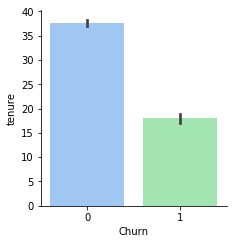

In [230]:
g = sns.PairGrid(df,
                 y_vars= ['tenure'],
                 x_vars=['Churn'],
                 aspect=1, size=3.5)
g.map(sns.barplot, palette="pastel");

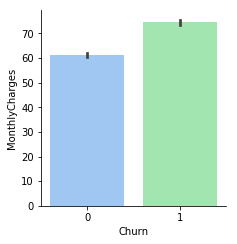

In [231]:
g = sns.PairGrid(df,
                 y_vars= ['MonthlyCharges'],
                 x_vars=['Churn'],
                 aspect=1, size=3.5)
g.map(sns.barplot, palette="pastel");

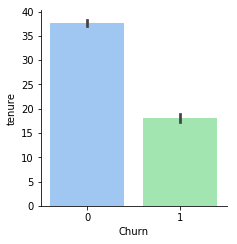

In [232]:
g = sns.PairGrid(df,
                 y_vars= ['tenure'],
                 x_vars=['Churn'],
                 aspect=1, size=3.5)
g.map(sns.barplot, palette="pastel");

Text(0,0.5,'Churn')

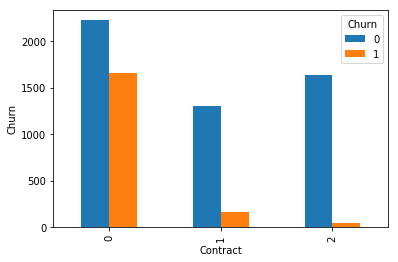

In [233]:
pd.crosstab(df.Contract,df.Churn).plot(kind='bar')
plt.xlabel('Contract')
plt.ylabel('Churn')

Text(0,0.5,'Churn')

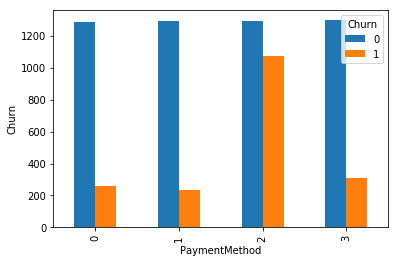

In [235]:
pd.crosstab(df.PaymentMethod,df.Churn).plot(kind='bar')
plt.xlabel('PaymentMethod')
plt.ylabel('Churn')

Conclusion


When a customer leaves, how often does the classifier predict that correctly? 
-> “Recall” and a quick look at these diagrams can demonstrate that SVM is best for this criteria with 79%

When a classifier predicts a customer will leave, how often does that customer actually leave? 
-> “Precision” of Logistic Regression with 64%

F1-score of Logistic Regression with 79%


Some important things about the features:

-tenure, Contract, PaymentMethod, MonthlyCharges play a role in customer churn.
-Customers use electronic check; on a month-to-month contract; within 12 months tenure, are more likely to churn.
-On the other hand, customers with one or two year contract; longer than 12 months tenure are less likely to churn.